In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import sklearn

In [76]:
data = pd.read_excel("C:/Users/user/Downloads/Data Science Case Study/Case 1 - Winemakers.xlsx")

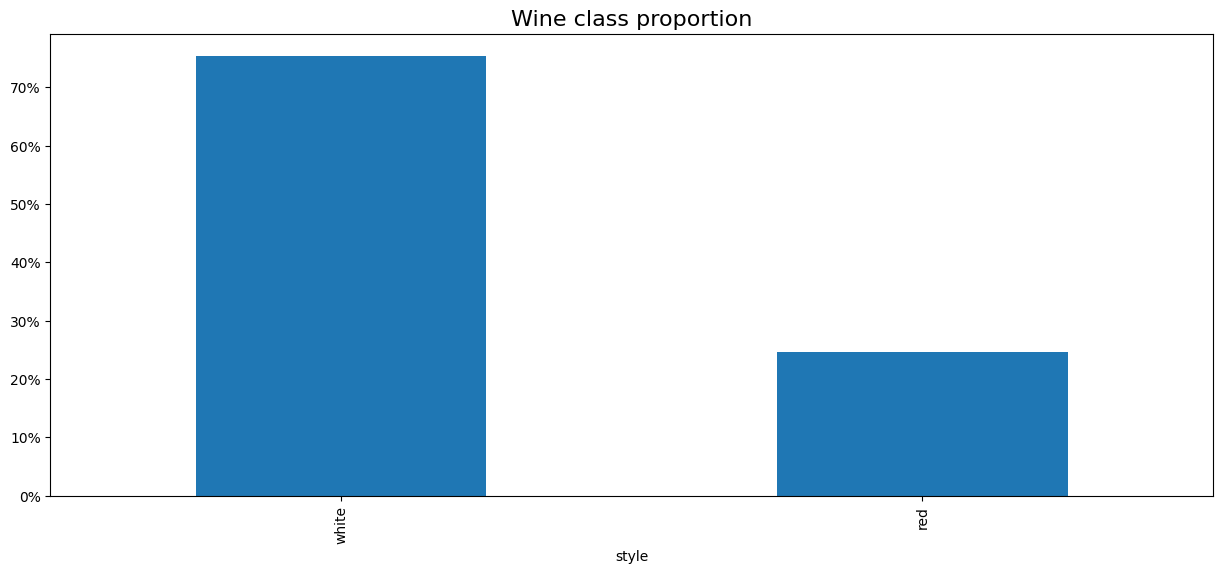

In [3]:
data = data["style"].value_counts(normalize=True)
data.plot(kind='bar',figsize=(15,6))
plt.title("Wine class proportion",fontsize= 16)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [4]:
data.describe()

count    2.000000
mean     0.500000
std      0.359050
min      0.246114
25%      0.373057
50%      0.500000
75%      0.626943
max      0.753886
Name: proportion, dtype: float64

In [5]:
data

style
white    0.753886
red      0.246114
Name: proportion, dtype: float64

In [11]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

In [7]:
data_1=data[(data['quality']==8) | (data['quality']==9)].reset_index().drop(['index'],axis=1)
data_1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.9,0.350,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8,red
1,10.3,0.320,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8,red
2,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8,red
3,12.6,0.310,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8,red
4,11.3,0.620,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,5.2,0.300,0.34,1.5,0.038,18.0,96.0,0.98942,3.56,0.48,13.0,8,white
194,6.4,0.320,0.25,5.0,0.055,28.0,138.0,0.99171,3.27,0.50,12.4,8,white
195,4.4,0.320,0.39,4.3,0.030,31.0,127.0,0.98904,3.46,0.36,12.8,8,white
196,3.9,0.225,0.40,4.2,0.030,29.0,118.0,0.98900,3.57,0.36,12.8,8,white


In [8]:
# ## EDA - Correlation Graph( Heat Map ) of the entire data.

# ## Analysis - 1

In [9]:
data.drop(['style'],axis=1).corr().style.background_gradient(cmap="coolwarm")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


In [10]:

# ## Insights:
# 
# By this we can understand that the "quality" is positively correlated with citric acid, free_sulfur_dioxide,
# pH, sulphate and alcohol.
# 
# In case of feature selection we can consider those variables having positive effect on the quality of wine i.e if these parametres are increased, the wine quality will increase

# ### To validate the correlation results we would try to compare the average of independent variable accross all quality.

In [11]:
# ## Analysis - 2

In [12]:
data_F = data.drop(['style'],axis=1)

In [13]:
data_F['quality'] = data_F['quality'].astype(float)

In [14]:
val = data_F.groupby(['quality']).mean()
val

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3.0,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4.0,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5.0,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6.0,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7.0,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8.0,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9.0,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [15]:
# ## Insights:
# 
# The mean value of citric_acid is high for the high quality wine and reduces as the quality reduces.
# 
# The mean value of sulphate level reduces as the Quality of wine increase.
# 
# We can see the mean value of sulphate is always high is case of red wine compare to white wine. We can suggest to reduce the sulphate level to better the quality of the wines. This will reduce the acidity and intensity color of red wine which inturn improves the wine quality.
# 
# Lastly, higher the alcohol level better the wine.

In [16]:
# ## Analysis - 3
# 
# WHITE WINE

In [78]:
data['style'].replace(['red', 'white'],
                        [0, 1], inplace=True)

In [79]:
val_red = data[data['style']==1].groupby(['quality']).mean()
val_red

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,style
quality,,,,,,,,,,,,
3,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000,1.0
4,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454,1.0
5,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840,1.0
6,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372,1.0
7,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936,1.0
8,6.657143,0.277400,0.326514,5.671429,0.038314,36.720000,126.165714,0.992236,3.218686,0.486229,11.636000,1.0
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,1.0


In [92]:
df = data[data['style']==1]
df.iloc[:,:-1].corr().style.background_gradient(cmap="coolwarm")

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [20]:
# ## Insights:
# 
# The mean value of pH is high for high qulity wine, meaning the high quality wine's taste softer and the has pleasant
# smell.
# 
# The residual_sugar level decreases as quality increase. The low quality wine are sweeter in general. 
# 
# 
# 
# ### Suggestion to White wine makers: As compared to Red wine, White wine needs to have a softer taste to be good quality. By increasing the ph and decreasing the suger we can improve the quality of the white wine.

In [21]:
# ## Analysis - 5 Oulier Detection
# 
# Using seaborn function we have plotted the graph of all the numerical independent 
#variables to understand the distribution and outlier present in the data.
# 
# By these graphs we understand that a few variables are right skewed and have extreme outlier 
#the we would try to resolve this by doing an outlier treatement.

C:\Users\user\AppData\Local\Temp\ipykernel_27464\1485448741.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\user\AppData\Local\Temp\ipykernel_27464\1485448741.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
C:\Users\user\AppData\Local\Temp\ipykernel

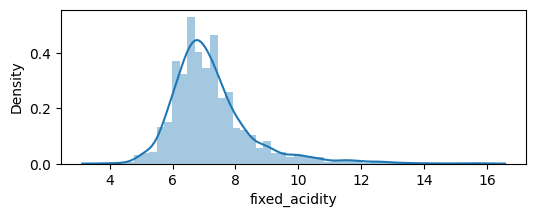

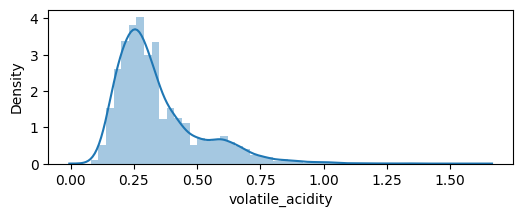

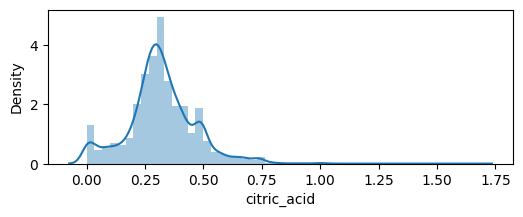

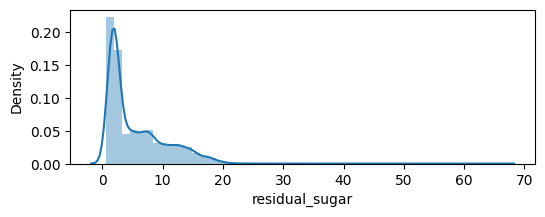

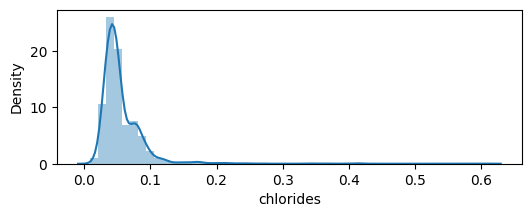

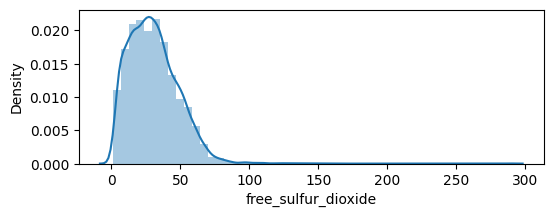

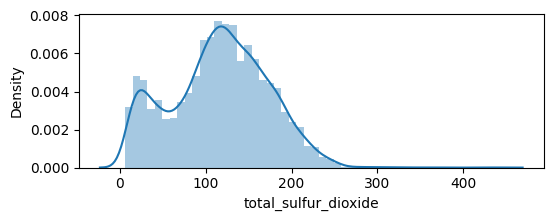

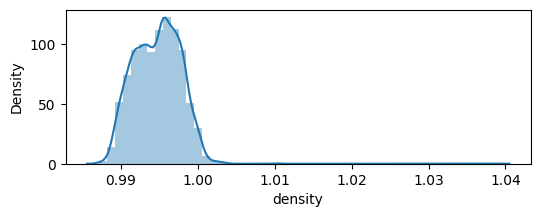

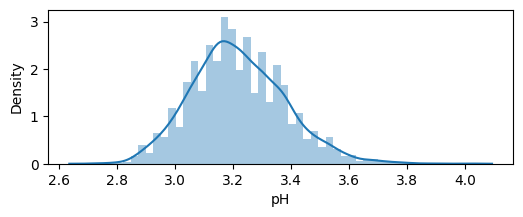

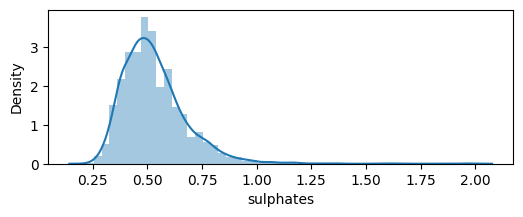

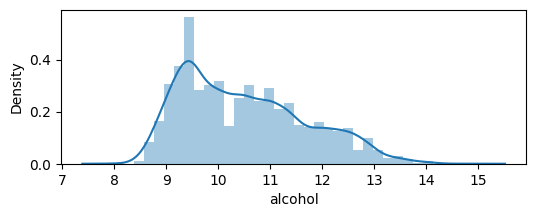

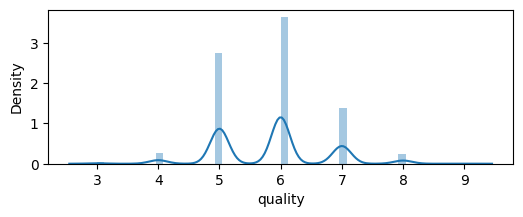

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 2]

columns = data.columns.tolist()
columns.remove('style')

for column in columns:
    plt.figure()
    sns.distplot(data[column])

In [23]:
out_values=data.iloc[:,:-1].describe(percentiles=[0.05,0.95])
out_values.drop(['count', 'mean', 'std', 'min', '50%', 'max'], axis=0, inplace=True)

In [24]:
df = data.iloc[:,:-1]

In [25]:
for i in out_values.columns:
    check= (lambda x: x if x>=out_values.loc['5%',i] and x<=out_values.loc['95%',i] else df[i].mean() )
    df[i]= df[i].apply(check)

C:\Users\user\AppData\Local\Temp\ipykernel_27464\3507853723.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\user\AppData\Local\Temp\ipykernel_27464\3507853723.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\user\AppData\Local\Temp\ipykernel_27464

KeyboardInterrupt: 

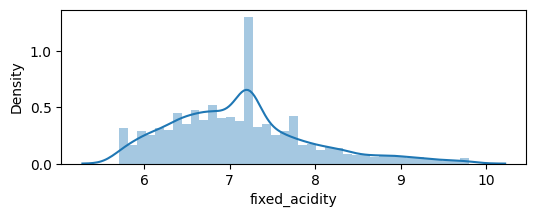

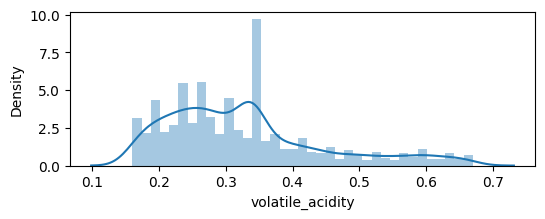

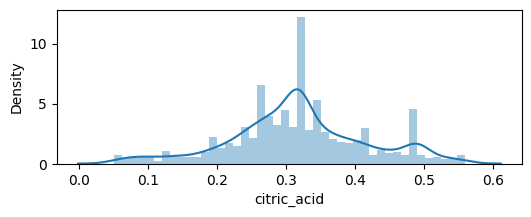

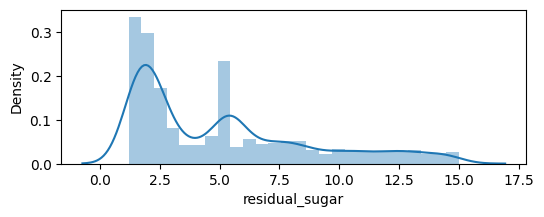

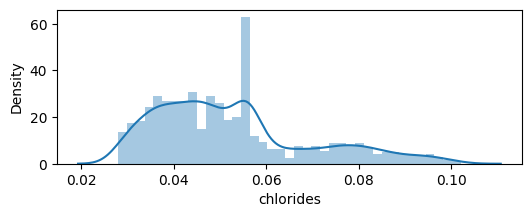

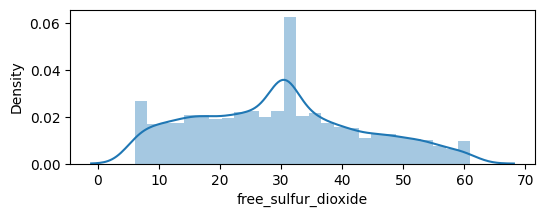

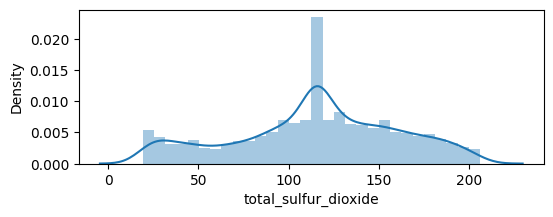

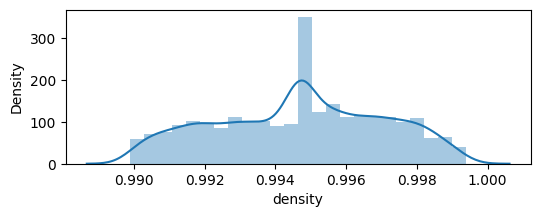

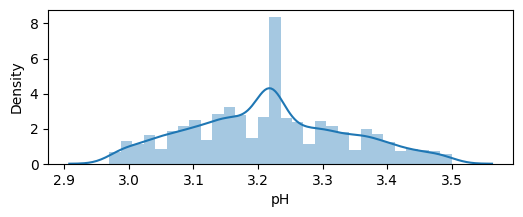

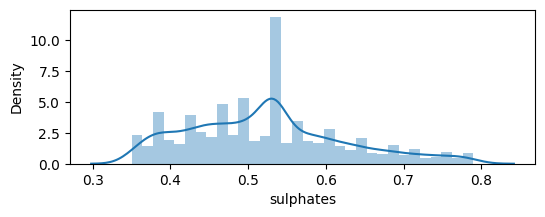

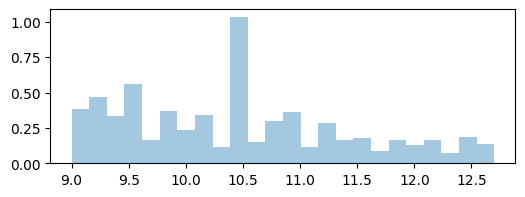

In [26]:
plt.rcParams['figure.figsize'] = [6, 2]

columns = df.columns.tolist()


for column in columns:
    plt.figure()
    sns.distplot(df[column])

In [27]:
# ## Data Preparation - Train test Split
# 
# ### We have used correlation to select the independent variable for the modelling purpose.
# 

In [28]:
# regression

# x= df.loc[:,['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
#              'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
#        'pH', 'sulphates', 'alcohol']]

x=df.loc[:,['fixed_acidity', 'volatile_acidity','residual_sugar',
       'chlorides', 'total_sulfur_dioxide',
       'pH', 'sulphates', 'alcohol']]

# x=df.loc[:,["volatile_acidity","citric_acid","chlorides","density","sulphates"]]
y= df.loc[:,'quality']

In [30]:

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=0)

In [31]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [32]:
model.score(xtest,ytest)

0.19114573034357074

In [33]:
print(f"intercept: {model.intercept_}")

intercept: 2.6696780521584


In [ ]:
y = 0* 20 + 2.5* 10 + c

In [34]:
print(f"slope: {model.coef_}")

slope: [-2.72298866e-02 -7.56123956e-01  8.99338258e-03 -4.53898112e+00
 -1.01786527e-03  2.96926837e-01  6.54397174e-01  2.49314763e-01]


In [35]:
# #### Model - Ridge Regression

In [36]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold


cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from numpy import absolute
from numpy import std
from numpy import mean

In [38]:
model = Ridge(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, xtrain,ytrain, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [39]:
cores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: -0.503 (0.016)


In [41]:
# #### Model - Decision tree regression

In [40]:
#decision tree regression

from sklearn.tree import DecisionTreeRegressor

In [42]:

t= DecisionTreeRegressor(max_depth=5,min_samples_leaf= 20)

In [43]:

t.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20)

In [44]:
t.score(xtest,ytest)

0.20431938775000613

In [45]:
# ## Classification Models
# 
# #### Model - Random forest classifier with binary class.

# #### We can group the wines into 2 classes, good and bad. For this we can consider 3,4,5,6 and bad(1) and 7,8,9 as good(2).
# 

In [46]:
##     only for classification
df['class'] = df['quality'].map({3: 1, 4: 1,5: 1,6: 1,7: 2,8: 2,9: 2})

In [54]:
df = df.dropna()

In [55]:
x= df.loc[:,['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
             'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

# x=df.loc[:,["volatile_acidity","citric_acid","chlorides","density","sulphates"]]
y= df.loc[:,'class']

In [56]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=0)

In [57]:
ytrain

2825    2.0
2349    1.0
3407    1.0
2526    2.0
4409    2.0
       ... 
5321    1.0
3511    1.0
1742    1.0
2793    1.0
2928    1.0
Name: class, Length: 4237, dtype: float64

In [58]:

from sklearn.ensemble import RandomForestClassifier

In [59]:

r= RandomForestClassifier(max_depth=3,min_samples_leaf= 5)
r.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, min_samples_leaf=5)

In [60]:

r.score(xtest,ytest)

0.8138766519823789

In [61]:

# ## Model - KNN(K-Nearest Neighbors Algorithm) for Multiclass Classification.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [63]:
df1 = data


# #### For Multiclass classification model we are grouping the quality variable into 3 groups. 
#quality 3,4 as bad (1) ,quality 5,6,7 as average (2) and quality 8,9 as good (3).

In [64]:
df1['class'] = df1['quality'].map({3: 1, 4: 1,5: 2,6: 2,7: 2,8: 3,9: 3})

In [65]:

test_df1 = df1.drop(['style','class'],axis=1)
test_df1.groupby(['quality']).mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [66]:

test_df1 = df1.drop(['style','quality'],axis=1)
test_df1.groupby(['class']).mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
class,,,,,,,,,,,
1,7.357724,0.465163,0.273374,4.273984,0.062126,22.902439,105.701220,0.994944,3.234797,0.505732,10.184350
2,7.221469,0.336151,0.319974,5.493772,0.056285,30.704940,116.095985,0.994759,3.217614,0.532959,10.465055
3,6.850000,0.291187,0.333889,5.351010,0.040778,34.505051,117.479798,0.992487,3.225354,0.511313,11.691414


In [67]:
out_values=df1.iloc[:,:-3].describe(percentiles=[0.05,0.95])
out_values.drop(['count', 'mean', 'std', 'min', '50%', 'max'], axis=0, inplace=True)

In [68]:

for i in out_values.columns:
    check= (lambda x: x if x>=out_values.loc['5%',i] and x<=out_values.loc['95%',i] else df1[i].mean() )
    df1[i]= df1[i].apply(check)

In [69]:
x= df1.loc[:,['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
             'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

# x=df.loc[:,["volatile_acidity","citric_acid","chlorides","density","sulphates"]]
y= df1.loc[:,'class']

In [70]:

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3, random_state=0)

In [71]:

knn = KNeighborsClassifier(n_neighbors = 3).fit(xtrain, ytrain)

accuracy = knn.score(xtest, ytest)
print(accuracy)

0.9194871794871795


In [72]:

knn_predictions = knn.predict(xtest) 
confusion_m = confusion_matrix(ytest, knn_predictions)

In [73]:

from sklearn import metrics
print(metrics.classification_report(ytest, knn_predictions))

              precision    recall  f1-score   support

           1       0.19      0.05      0.08        76
           2       0.94      0.98      0.96      1817
           3       0.28      0.14      0.19        57

    accuracy                           0.92      1950
   macro avg       0.47      0.39      0.41      1950
weighted avg       0.89      0.92      0.90      1950



In [ ]:
# ## Insights: 
# 
# #### The KNN model is giving better accuracy and the precision and recall values for each class are 
#also good we can use this
#model as a simulator if the wine maker wants to check the quality of wine by changing few parameter. 